In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load the dataset
data = pd.read_csv('generated_data.csv')
data.head()

,Working Since (Date),Gender,Work Type,Pay Grade,Current Resources,Mental Fatigue Score,Burn Rate,Employee Position
0,2019-06-02,Female,Organised,2,5,0.0,0.50,Cook
1,2019-05-21,Male,Organised,2,10,7.3,0.05,Maintenance Staff
2,2024-09-12,Male,Unorganised,4,3,3.0,0.19,Security Guard
3,2018-04-09,Female,Unorganised,1,3,0.0,0.41,Cleaner
4,2020-06-14,Male,Organised,4,7,7.5,0.52,Janitor


In [4]:
data.drop(columns=['Working Since (Date)'], inplace=True)


In [5]:
data_encoded = pd.get_dummies(data, columns=['Gender', 'Work Type', 'Employee Position'])

In [6]:
X = data_encoded.drop(columns=['Burn Rate']).values  # Features
y = data_encoded['Burn Rate'].values  # Target

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
model = Sequential()
model.add(Dense(100, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='linear'))

In [17]:
model.compile(loss='mean_squared_error', optimizer='adam')


In [18]:
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=50, batch_size=32)

Epoch 1/50
500/500 [==============================] - 5s 7ms/step - loss: 0.0595 - val_loss: 0.0583
Epoch 2/50
500/500 [==============================] - 4s 7ms/step - loss: 0.0542 - val_loss: 0.0555
Epoch 3/50
500/500 [==============================] - 4s 7ms/step - loss: 0.0530 - val_loss: 0.0562
Epoch 4/50
500/500 [==============================] - 4s 7ms/step - loss: 0.0526 - val_loss: 0.0540
Epoch 5/50
500/500 [==============================] - 4s 7ms/step - loss: 0.0519 - val_loss: 0.0535
Epoch 6/50
500/500 [==============================] - 4s 7ms/step - loss: 0.0518 - val_loss: 0.0539
Epoch 7/50
500/500 [==============================] - 4s 7ms/step - loss: 0.0512 - val_loss: 0.0533
Epoch 8/50
500/500 [==============================] - 4s 7ms/step - loss: 0.0514 - val_loss: 0.0535
Epoch 9/50
500/500 [==============================] - 3s 7ms/step - loss: 0.0511 - val_loss: 0.0534
Epoch 10/50
500/500 [==============================] - 4s 7ms/step - loss: 0.0509 - val_loss: 0.0534

In [19]:
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.05389286802981399


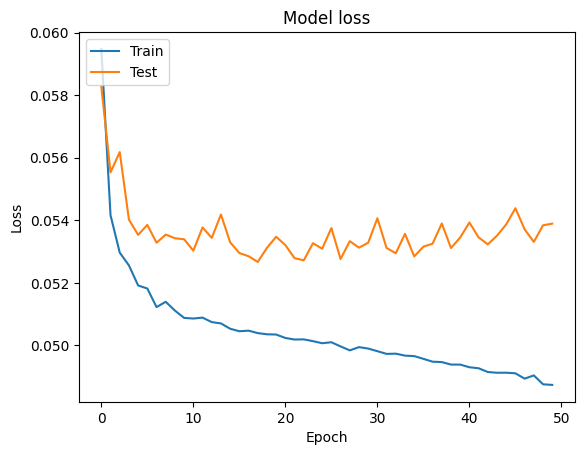

In [20]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()